# Decision tree for recognizing the flags of countries

In [112]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from ucimlrepo import fetch_ucirepo

flags = fetch_ucirepo(id=40)

In [113]:
X = flags.data.features.iloc[:,1:]
y = flags.data.features['name']
print(X.head())
print(y.head())
print(type(y))
df = X.join(y.to_frame())
print(df.head())

   landmass  zone  area  population  language  religion  bars  stripes  \
0         5     1   648          16        10         2     0        3   
1         3     1    29           3         6         6     0        0   
2         4     1  2388          20         8         2     2        0   
3         6     3     0           0         1         1     0        0   
4         3     1     0           0         6         0     3        0   

   colours  red  ...  saltries  quarters  sunstars  crescent  triangle  icon  \
0        5    1  ...         0         0         1         0         0     1   
1        3    1  ...         0         0         1         0         0     0   
2        3    1  ...         0         0         1         1         0     0   
3        5    1  ...         0         0         0         0         1     1   
4        3    1  ...         0         0         0         0         0     0   

  animate  text  topleft  botright  
0       0     0    black     green  


In [114]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
# cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours', 'red','green','blue','gold','white','black','orange','mainhue','circles', 'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
# df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)
# This cell only if we dont have done `pip install ucimlrepo`

In [115]:
#variable names to use as predictors
var = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'bars', 'stripes', 'circles', 'crosses', 'saltries', 'quarters', 'sunstars', 'triangle', 'animate']

#Print number of countries by landmass, or continent (3=Europe, 6=Oceania)
print(df[['name', 'landmass']].groupby('landmass').count())


          name
landmass      
1           31
2           17
3           35
4           52
5           39
6           20


In [116]:
#Create a new dataframe with only flags from Europe and Oceania
df_36 =  df[df['landmass'].isin([3, 6])]
print(df_36.head())

    landmass  zone  area  population  language  religion  bars  stripes  \
1          3     1    29           3         6         6     0        0   
3          6     3     0           0         1         1     0        0   
4          3     1     0           0         6         0     3        0   
10         6     2  7690          15         1         1     0        0   
11         3     1    84           8         4         0     0        3   

    colours  red  ...  quarters  sunstars  crescent  triangle  icon  animate  \
1         3    1  ...         0         1         0         0     0        1   
3         5    1  ...         0         0         0         1     1        1   
4         3    1  ...         0         0         0         0     0        0   
10        3    1  ...         1         6         0         0     0        0   
11        2    1  ...         0         0         0         0     0        0   

   text  topleft  botright            name  
1     0      red       

In [117]:
# red=1, blue=2, gold=3, white=4, black=5, green=6
df_36.loc[:,'mainhue'] = df_36['mainhue'].replace({
    'red': 1,
    'blue': 2,
    'gold': 3,
    'white': 4,
    'black': 5,
    'green': 6
})
print(df_36['mainhue'].unique())

[1 2 3 4 5 6]


C:\Users\Aigars\AppData\Local\Temp\ipykernel_16672\3845492813.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_36.loc[:,'mainhue'] = df_36['mainhue'].replace({


In [118]:
# Print the average values of the predictors for Europe and Oceania
df_36_grouped = df_36.groupby('landmass')[var].mean().T
print(df_36_grouped)

landmass         3     6
red       0.828571   0.8
green          0.2   0.2
blue      0.514286   0.8
gold      0.428571   0.6
white     0.771429  0.95
black     0.171429  0.15
orange    0.057143  0.15
mainhue   2.285714   2.1
bars      0.628571   0.0
stripes   1.285714   0.4
circles   0.028571  0.15
crosses   0.285714   0.4
saltries  0.028571   0.3
quarters  0.028571   0.4
sunstars  0.142857   3.3
triangle  0.028571  0.25
animate   0.114286   0.3


In [119]:
#Create labels for only Europe and Oceania
labels = (df['landmass'].isin([3, 6]))*1 
print(labels)

0      0
1      1
2      0
3      1
4      1
      ..
189    1
190    1
191    0
192    0
193    0
Name: landmass, Length: 194, dtype: int32


In [120]:
#Print the variable types for the predictors
print(df_36[var].dtypes)

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltries     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object


In [121]:
#Create dummy variables for categorical predictors
data = pd.get_dummies(df[var])
print(data.columns)

Index(['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'bars',
       'stripes', 'circles', 'crosses', 'saltries', 'quarters', 'sunstars',
       'triangle', 'animate', 'mainhue_black', 'mainhue_blue', 'mainhue_brown',
       'mainhue_gold', 'mainhue_green', 'mainhue_orange', 'mainhue_red',
       'mainhue_white'],
      dtype='object')


In [122]:
#Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [123]:
print(x_train.dtypes)

red               int64
green             int64
blue              int64
gold              int64
white             int64
black             int64
orange            int64
bars              int64
stripes           int64
circles           int64
crosses           int64
saltries          int64
quarters          int64
sunstars          int64
triangle          int64
animate           int64
mainhue_black      bool
mainhue_blue       bool
mainhue_brown      bool
mainhue_gold       bool
mainhue_green      bool
mainhue_orange     bool
mainhue_red        bool
mainhue_white      bool
dtype: object


In [124]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for depth in depths:
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(x_train, y_train)
    acc_depth.append(dtree.score(x_test, y_test))

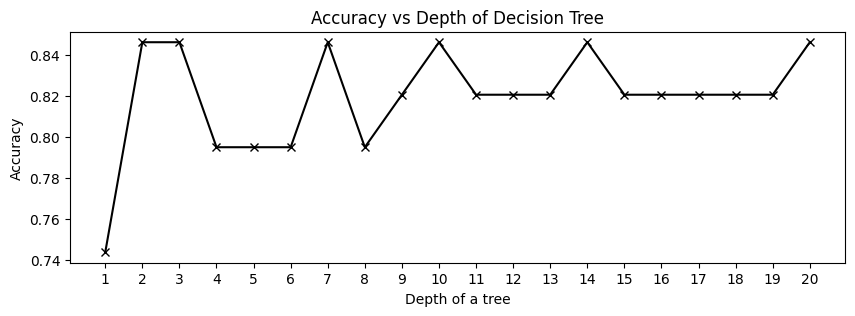

In [125]:
#Plot the accuracy vs depth
plt.figure(figsize=(10, 3))
plt.plot(depths, acc_depth, 'kx-')
plt.xlabel('Depth of a tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Decision Tree')
plt.xticks(depths)
plt.show()

In [126]:
#Find the largest accuracy and the depth this occurs
largest_acc_idx = np.argmax(acc_depth)
print(acc_depth)
print(largest_acc_idx)
print(list(depths)[largest_acc_idx])
best_depth = list(depths)[largest_acc_idx]

[0.7435897435897436, 0.8461538461538461, 0.8461538461538461, 0.7948717948717948, 0.7948717948717948, 0.7948717948717948, 0.8461538461538461, 0.7948717948717948, 0.8205128205128205, 0.8461538461538461, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8461538461538461, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8461538461538461]
1
2


In [127]:
#Refit decision tree model with the highest accuracy and plot the decision tree
dtree_largest_acc = DecisionTreeClassifier(max_depth=largest_acc+1)
dtree_largest_acc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [128]:
#Create a new list for the accuracy values of a pruned decision tree.  Loop through
#the values of ccp and append the scores to the list
acc_pruned = []
ccps = np.array(list(range(0,101)))/100 
for ccp in ccps:
    dtree_ccp = DecisionTreeClassifier(ccp_alpha=ccp)
    dtree_ccp.fit(x_train, y_train)
    acc_pruned.append(dtree_ccp.score(x_test, y_test))

print(acc_pruned)

[0.8461538461538461, 0.8717948717948718, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436, 0.7435897435897436,

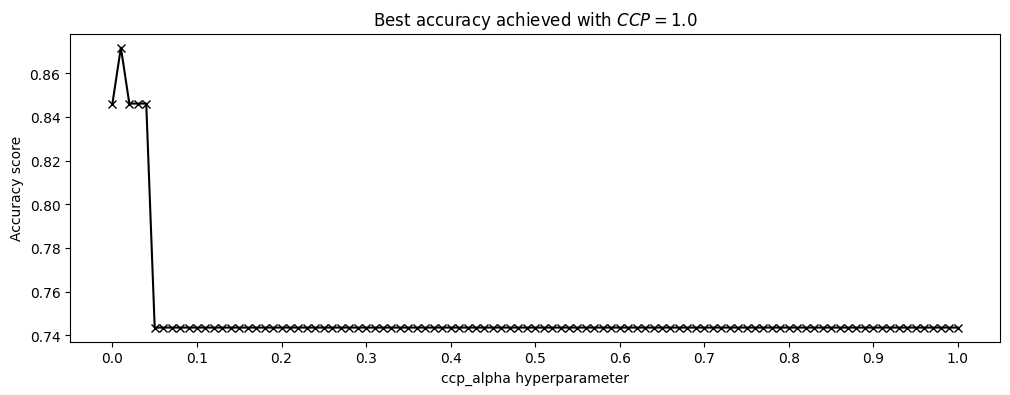

In [129]:
#Plot the accuracy vs ccp_alpha
plt.figure(figsize=(12, 4))

plt.plot(ccps, acc_pruned, 'kx-')
plt.title(f"Best accuracy achieved with $CCP={np.max(ccps)}$")
plt.xlabel('ccp_alpha hyperparameter')
plt.ylabel('Accuracy score')
plt.xticks(np.array(list(range(0, 101, 10)))/100)
plt.show()

In [130]:

#Find the largest accuracy and the ccp value this occurs
best_ccp_idx = np.argmax(acc_pruned)
best_ccp = ccps[best_ccp_idx]
print(best_ccp_idx)
print(best_ccp)


1
0.01


In [131]:
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dtree_best = DecisionTreeClassifier(max_depth=best_depth, ccp_alpha=best_ccp)
dtree_best.fit(x_train, y_train)
dtree_best.score(x_test, y_test)

0.8461538461538461

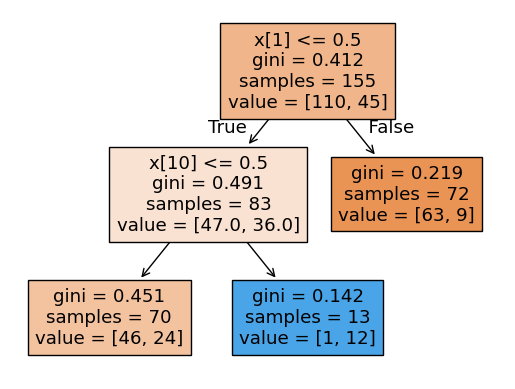

In [136]:
#Plot the final decision tree
tree.plot_tree(dtree_best, filled=True)
plt.show()